In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.decomposition import KernelPCA

In [2]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [5]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.42258504 0.90632328]]
Объясненная дисперсия: [0.99046847]


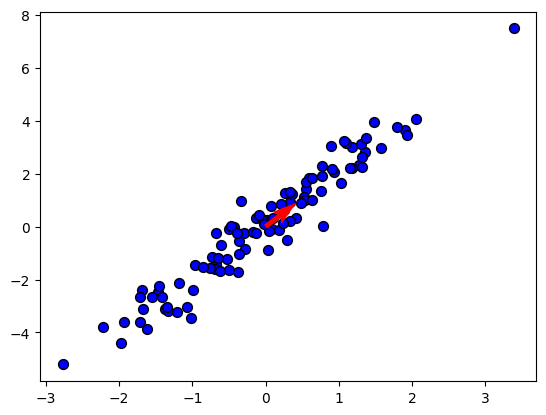

In [6]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

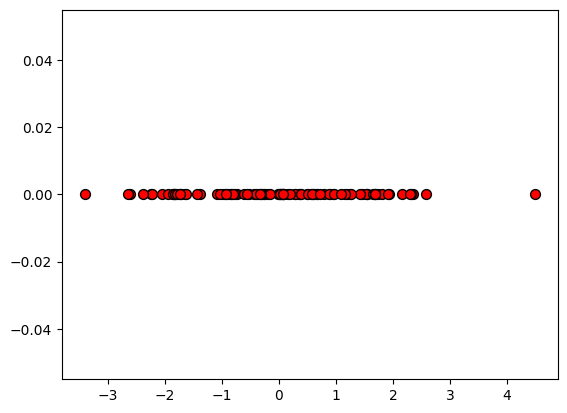

In [8]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [9]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

In [11]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [12]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


In [13]:
n_components_range = range(1, 31)
explained_variance = []

In [14]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

In [15]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


In [16]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [18]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[8.70632924 8.11312878]]


In [19]:
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [21]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

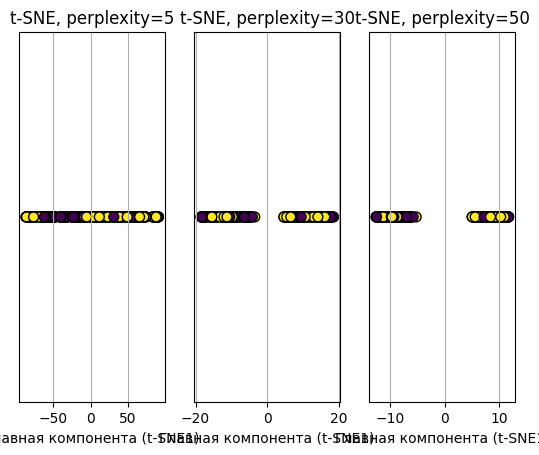

In [22]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

In [23]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

In [24]:
kernels = ['linear', 'poly', 'rbf']

In [25]:
for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

In [26]:
gamma_values = [0.1, 1, 10]

## 1. Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.

In [27]:
def generate_data(noise_level):
    n_samples = 100
    x = np.random.normal(0, 1, n_samples)
    y = 2 * x + np.random.normal(0, noise_level, n_samples)
    return np.column_stack((x, y))

In [ ]:
noise_levels = [0.1, 0.5, 1.0, 2.0]

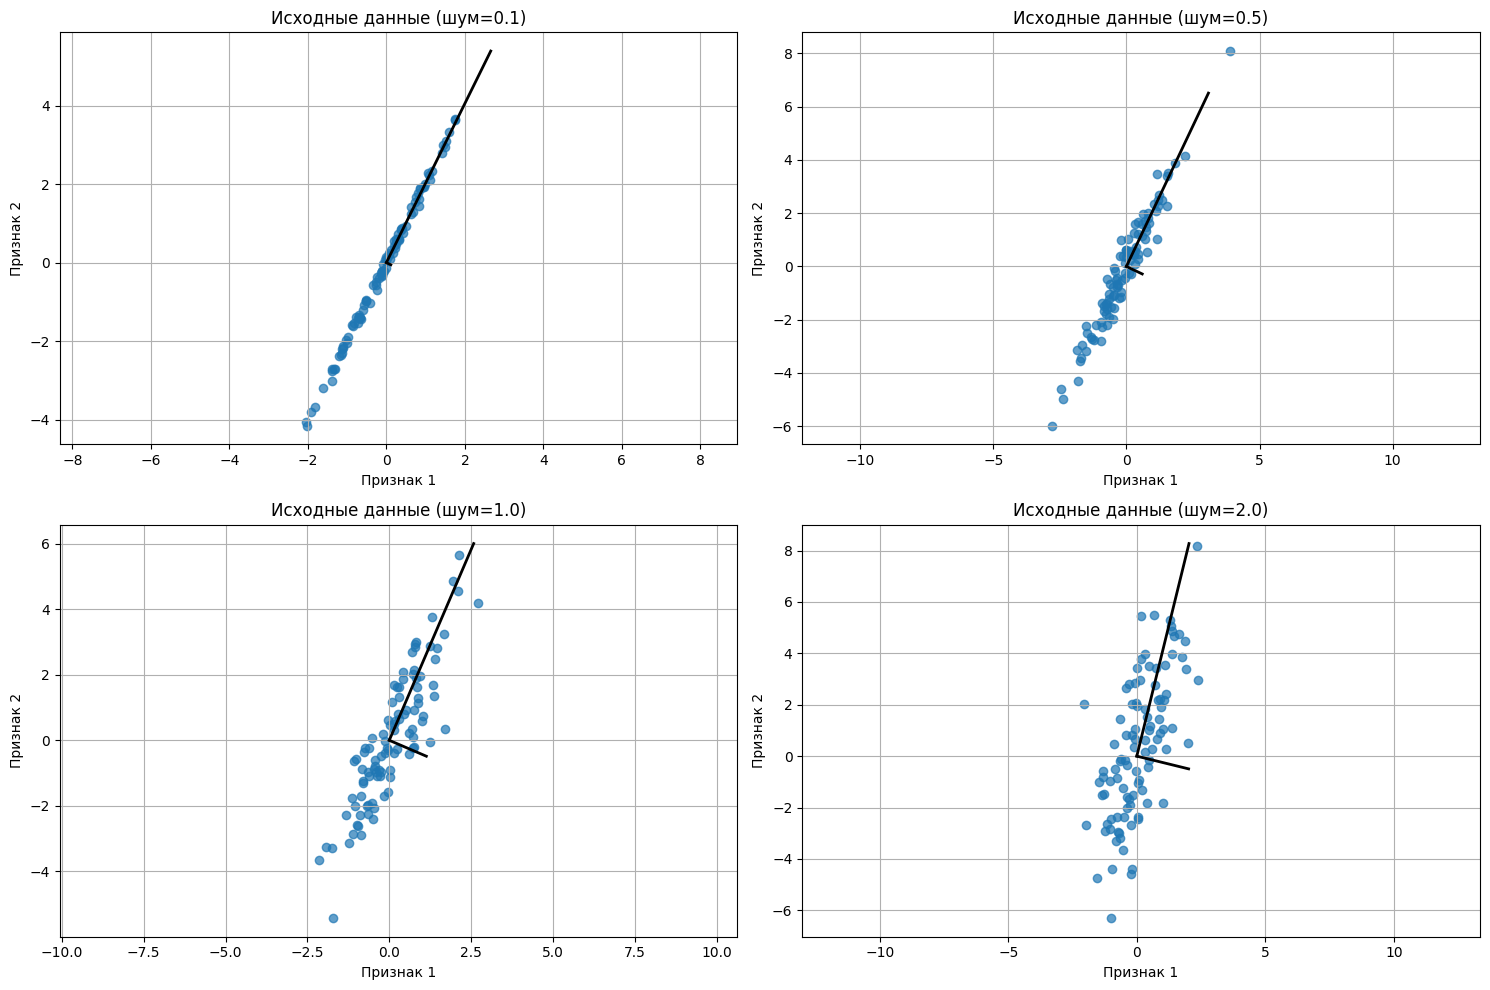

In [ ]:
plt.figure(figsize=(15, 10))

for i, noise in enumerate(noise_levels):
    X = generate_data(noise)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
    plt.title(f'Исходные данные (шум={noise})')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        plt.plot([0, v[0]], [0, v[1]], '-k', lw=2)

    plt.grid()
    plt.axis('equal')

plt.tight_layout()
plt.show()

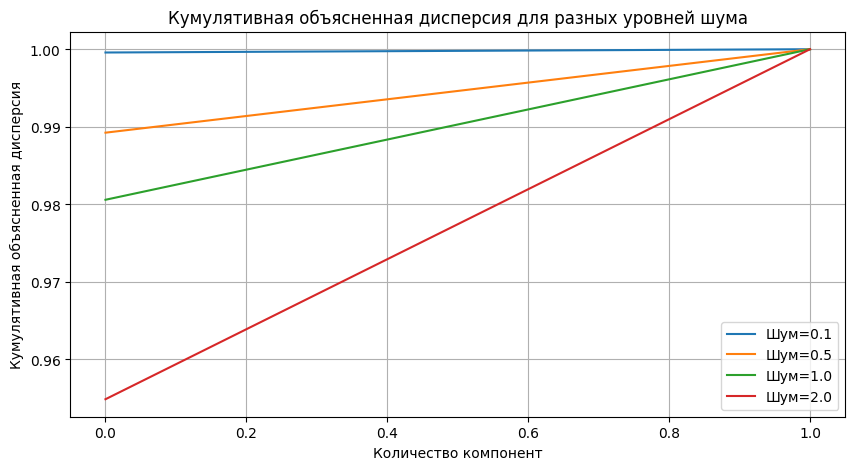

In [ ]:
plt.figure(figsize=(10, 5))

for noise in noise_levels:
    X = generate_data(noise)
    pca = PCA().fit(X)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label=f'Шум={noise}')

plt.title('Кумулятивная объясненная дисперсия для разных уровней шума')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.legend()
plt.grid()
plt.show()

## 2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

In [ ]:
n_samples = 200
noise_level = 0.5

In [ ]:
x1 = np.random.normal(0, 1, n_samples)

In [ ]:
x2 = 2 * x1 + np.random.normal(0, noise_level, n_samples)

In [ ]:
x3 = 0.5 * x1 + 1.5 * x2 + np.random.normal(0, noise_level, n_samples)

In [ ]:
X = np.column_stack((x1, x2, x3))

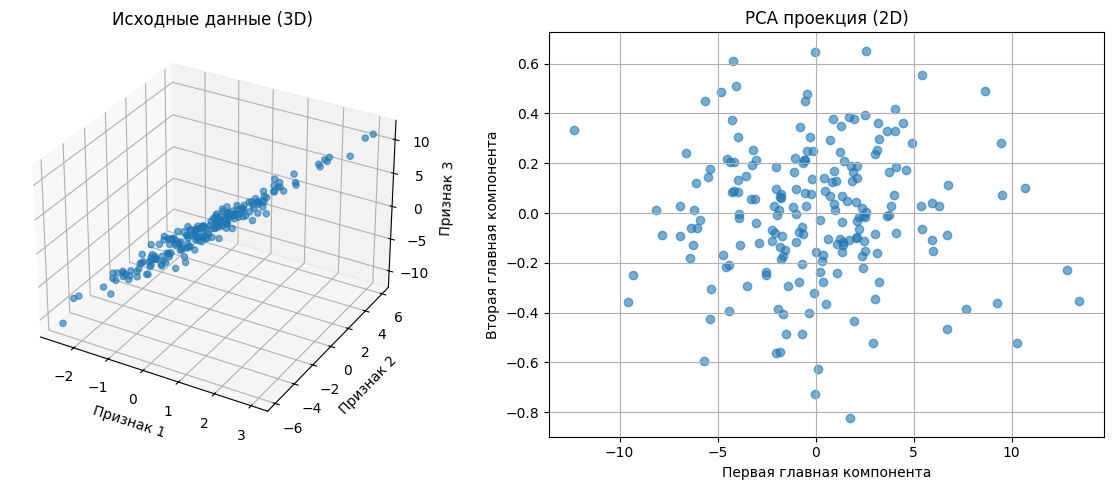

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Исходные данные (3D)')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
ax2.set_xlabel('Первая главная компонента')
ax2.set_ylabel('Вторая главная компонента')
ax2.set_title('PCA проекция (2D)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Объясненная дисперсия каждой компоненты:", pca.explained_variance_ratio_)
print("Суммарная объясненная дисперсия:", sum(pca.explained_variance_ratio_))

Объясненная дисперсия каждой компоненты: [0.9931092 0.0041314]
Суммарная объясненная дисперсия: 0.9972406019890792


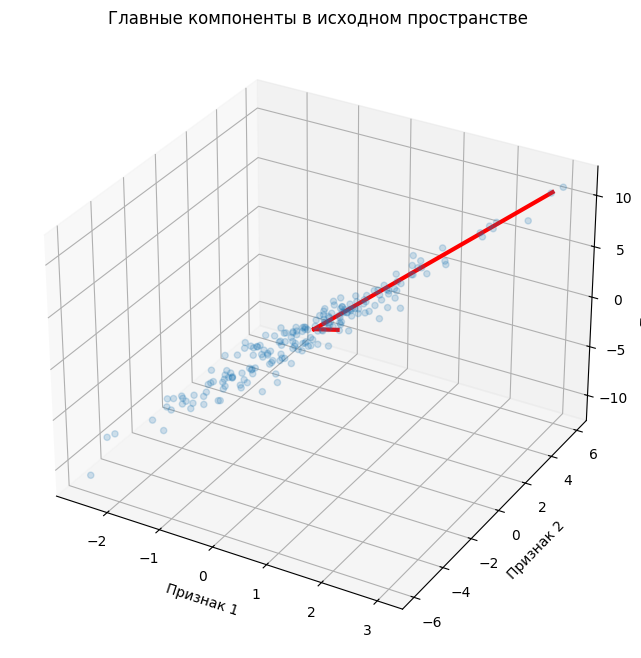

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.plot([0, v[0]], [0, v[1]], [0, v[2]], '-r', lw=3)

ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Главные компоненты в исходном пространстве')
plt.show()

## 3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.

In [ ]:
def generate_data(distance_between_centers=4, noise=0.5, n_samples=100):
    x1 = np.random.normal(0, 1, n_samples)
    y1 = np.random.normal(0, 1, n_samples)

    x2 = np.random.normal(distance_between_centers, 1, n_samples)
    y2 = np.random.normal(distance_between_centers, 1, n_samples)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

    X += np.random.normal(0, noise, X.shape)

    return X, y

In [ ]:
distances = [8, 4, 2, 1]

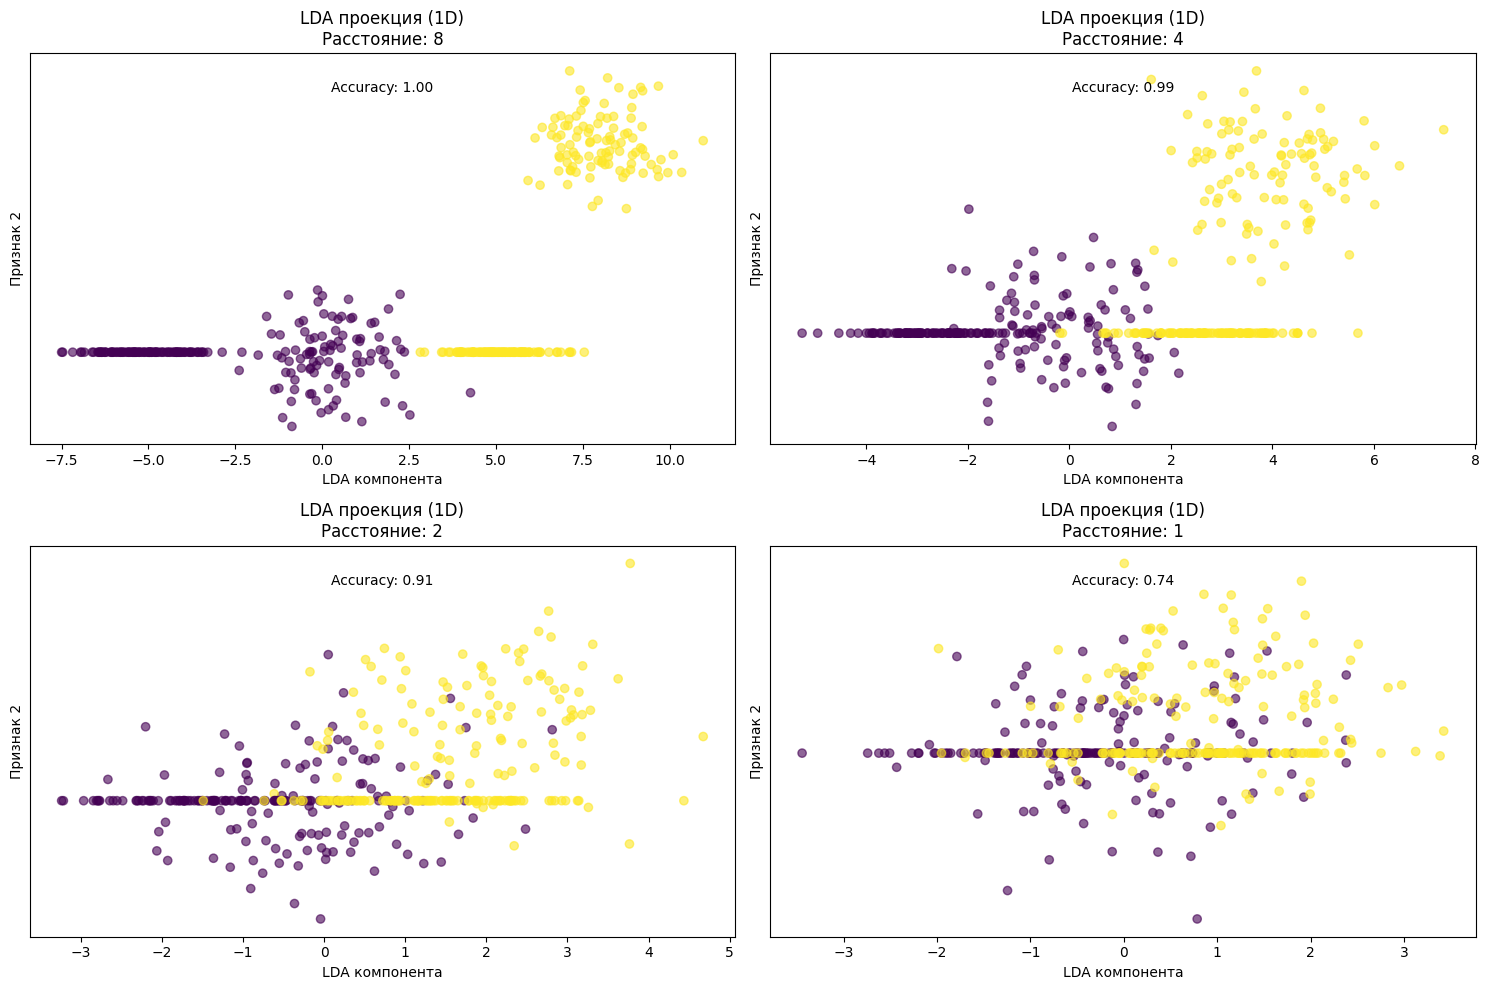

In [ ]:
plt.figure(figsize=(15, 10))

for i, distance in enumerate(distances):
    X, y = generate_data(distance_between_centers=distance)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X_scaled, y)

    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.title(f'Исходные данные\nРасстояние между центрами: {distance}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

    plt.subplot(2, 2, i+1)
    plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='viridis', alpha=0.6)
    plt.title(f'LDA проекция (1D)\nРасстояние: {distance}')
    plt.xlabel('LDA компонента')
    plt.yticks([])

    separation_score = lda.score(X_scaled, y)
    plt.text(0.5, 0.9, f'Accuracy: {separation_score:.2f}',
             transform=plt.gca().transAxes, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
distances = np.linspace(0.5, 8, 15)
scores = []

In [ ]:
for distance in distances:
    X, y = generate_data(distance_between_centers=distance)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lda = LDA()
    lda.fit(X_scaled, y)
    scores.append(lda.score(X_scaled, y))

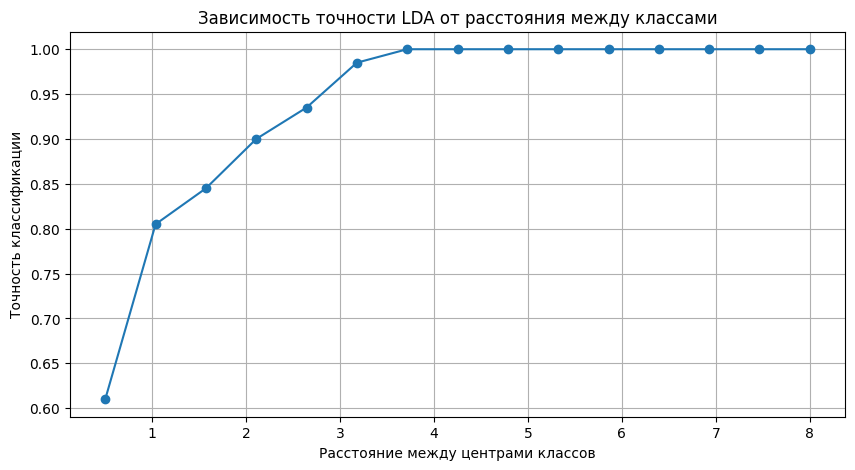

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(distances, scores, 'o-')
plt.title('Зависимость точности LDA от расстояния между классами')
plt.xlabel('Расстояние между центрами классов')
plt.ylabel('Точность классификации')
plt.grid(True)
plt.show()

## 4. Добавьте третий класс и примените LDA с n_components=2.

In [28]:
from matplotlib.colors import ListedColormap

In [ ]:
def generate_three_classes(distance=2, n_samples=100, noise=0.7):
    x1 = np.random.normal(0, noise, n_samples)
    y1 = np.random.normal(0, noise, n_samples)

    x2 = np.random.normal(distance, noise, n_samples)
    y2 = np.random.normal(0, noise, n_samples)

    x3 = np.random.normal(distance/2, noise, n_samples)
    y3 = np.random.normal(distance, noise, n_samples)

    X = np.vstack([np.column_stack((x1, y1)),
                  np.column_stack((x2, y2)),
                  np.column_stack((x3, y3))])
    y = np.hstack([np.zeros(n_samples),
                  np.ones(n_samples),
                  np.ones(n_samples)*2])

    return X, y

In [ ]:
X, y = generate_three_classes(distance=3)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

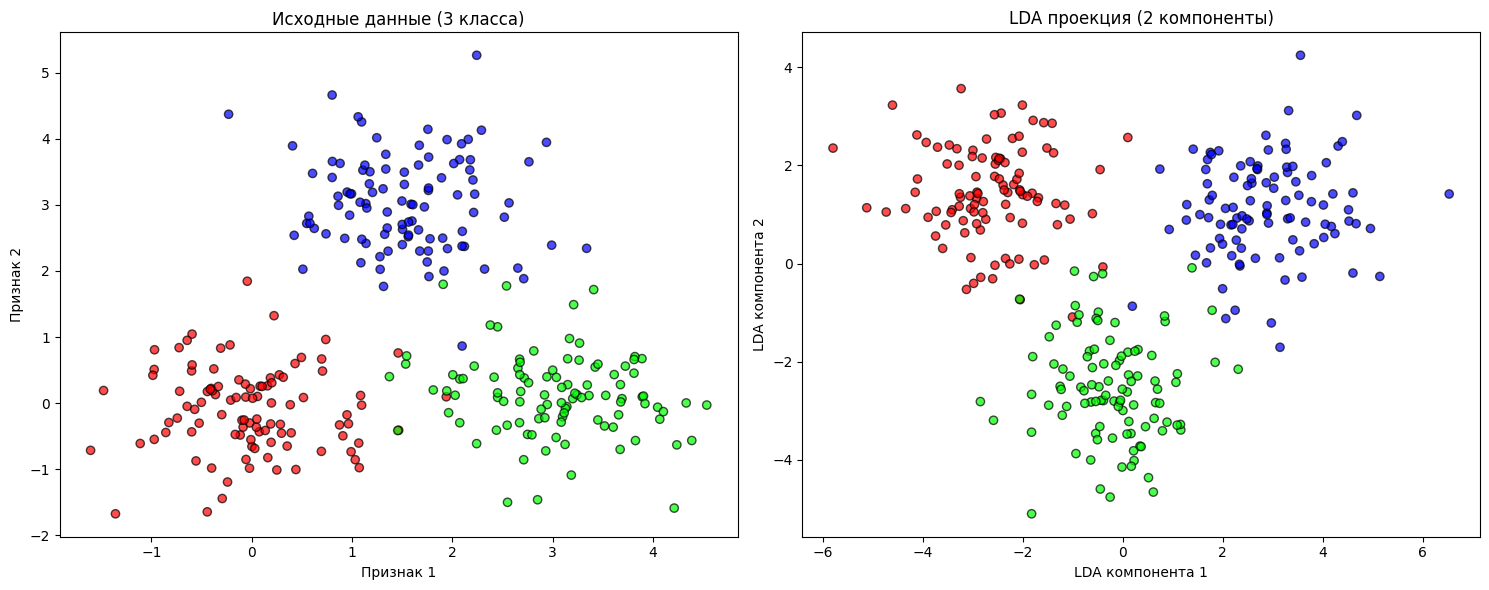

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
plt.title('Исходные данные (3 класса)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
plt.title('LDA проекция (2 компоненты)')
plt.xlabel('LDA компонента 1')
plt.ylabel('LDA компонента 2')

plt.tight_layout()
plt.show()

In [ ]:
print("Объясненная дисперсия:", lda.explained_variance_ratio_)
print("Точность на обучающих данных:", lda.score(X_scaled, y))

Объясненная дисперсия: [0.61000471 0.38999529]
Точность на обучающих данных: 0.9766666666666667


In [ ]:
def plot_decision_boundaries(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
    plt.title(title)
    plt.xlabel('LDA компонента 1')
    plt.ylabel('LDA компонента 2')
    plt.show()

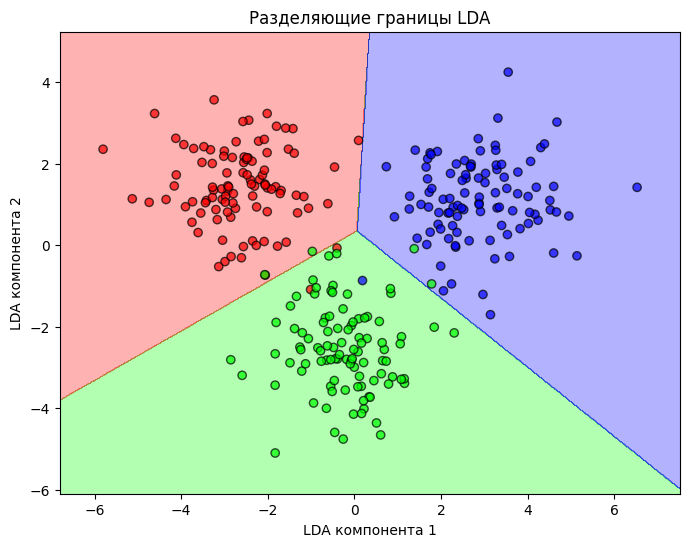

In [ ]:
lda_2d = LDA()
lda_2d.fit(X_lda, y)
plot_decision_boundaries(X_lda, y, lda_2d, "Разделяющие границы LDA")

## 5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

In [29]:
from sklearn.metrics import silhouette_score

In [ ]:
def generate_data():
    np.random.seed(42)
    n_samples = 100
    distance = 3

    X0 = np.random.multivariate_normal(
        mean=[0, 0],
        cov=[[1, 0.7], [0.7, 1]],
        size=n_samples
    )

    X1 = np.random.multivariate_normal(
        mean=[distance, 0],
        cov=[[1, -0.6], [-0.6, 1]],
        size=n_samples
    )

    X2 = np.random.multivariate_normal(
        mean=[distance/2, distance],
        cov=[[1, 0], [0, 1]],
        size=n_samples
    )

    X = np.vstack([X0, X1, X2])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples), np.ones(n_samples)*2])

    return X, y

In [ ]:
X, y = generate_data()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
plt.figure(figsize=(18, 6))
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<Figure size 1800x600 with 0 Axes>

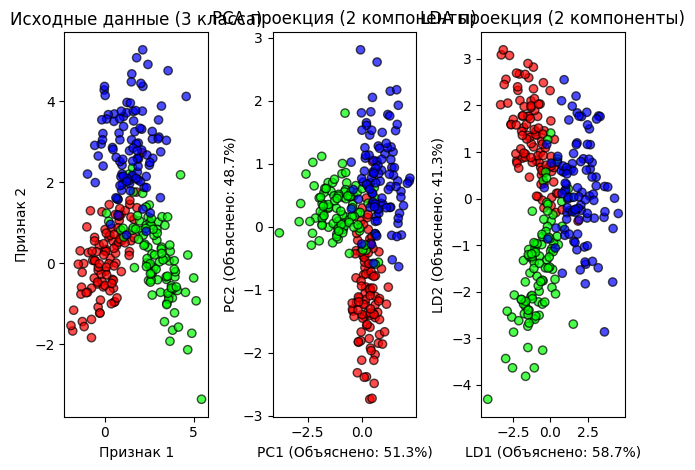

In [ ]:
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
plt.title('Исходные данные (3 класса)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
plt.title('PCA проекция (2 компоненты)')
plt.xlabel('PC1 (Объяснено: {:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (Объяснено: {:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))

plt.subplot(1, 3, 3)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
plt.title('LDA проекция (2 компоненты)')
plt.xlabel('LD1 (Объяснено: {:.1f}%)'.format(lda.explained_variance_ratio_[0]*100))
plt.ylabel('LD2 (Объяснено: {:.1f}%)'.format(lda.explained_variance_ratio_[1]*100))

plt.tight_layout()
plt.show()

In [ ]:
print("PCA - Silhouette score: {:.3f}".format(silhouette_score(X_pca, y)))
print("LDA - Silhouette score: {:.3f}".format(silhouette_score(X_lda, y)))

PCA - Silhouette score: 0.401
LDA - Silhouette score: 0.403


## 6. Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.

In [30]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
degrees = [2, 3, 4, 5]

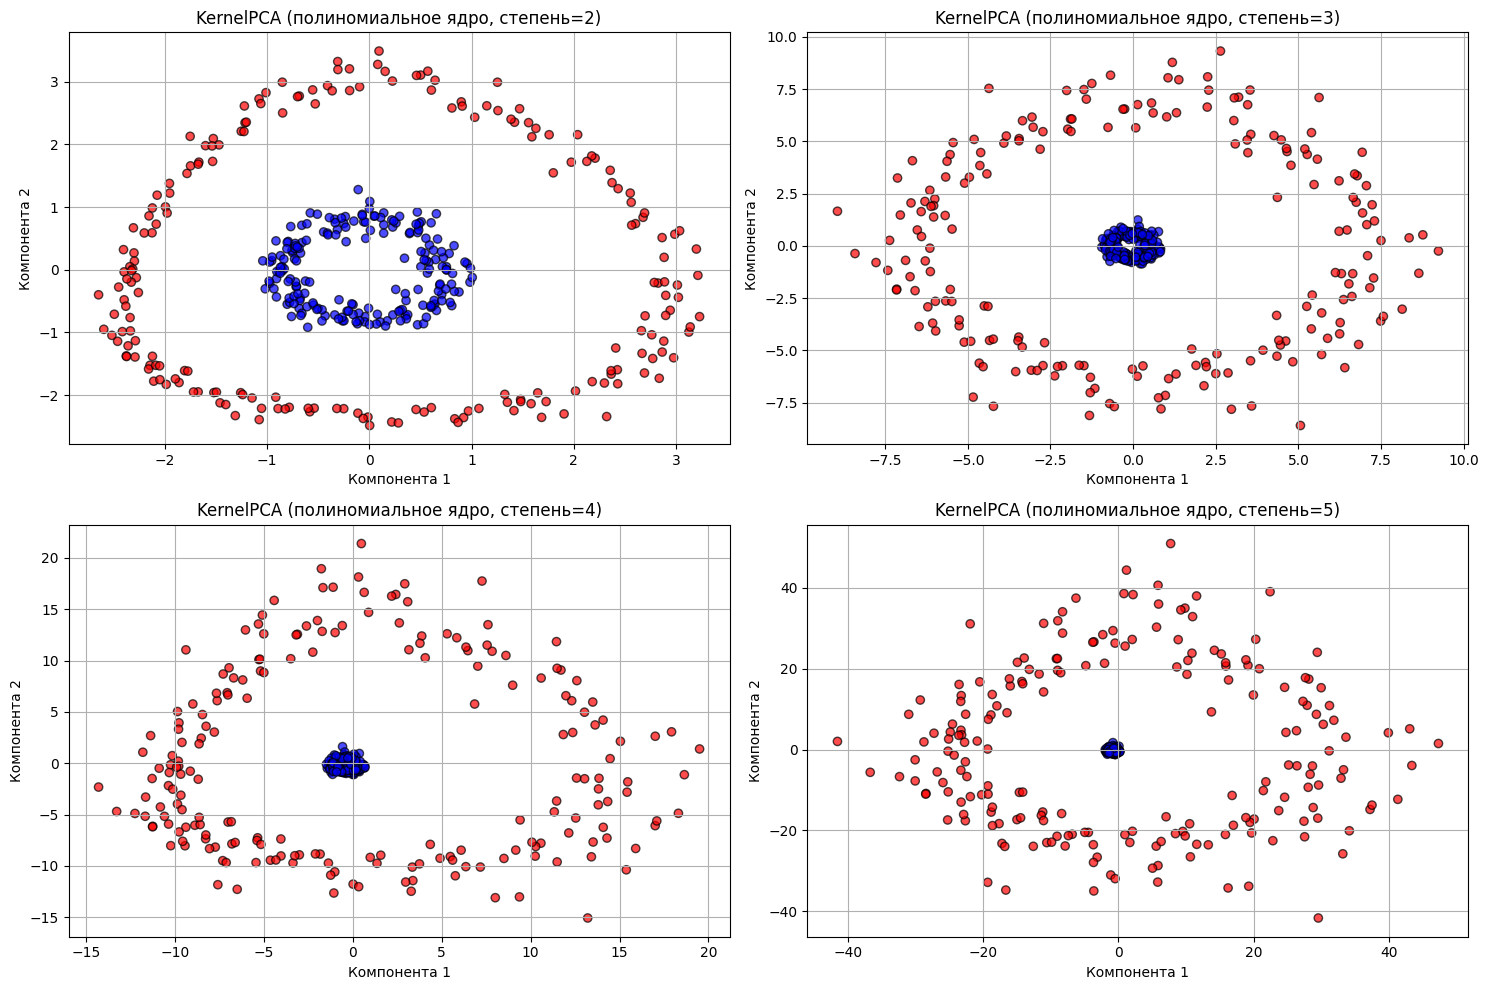

In [ ]:
plt.figure(figsize=(15, 10))
cmap = ListedColormap(['#FF0000', '#0000FF'])

for i, degree in enumerate(degrees):
    kpca = KernelPCA(n_components=2, kernel='poly', degree=degree, gamma=1, random_state=42)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(2, 2, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap=cmap, alpha=0.7, edgecolor='k')
    plt.title(f'KernelPCA (полиномиальное ядро, степень={degree})')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
degrees = range(1, 8)
silhouettes = []

In [ ]:
for degree in degrees:
    kpca = KernelPCA(n_components=2, kernel='poly', degree=degree, gamma=1)
    X_kpca = kpca.fit_transform(X_scaled)
    silhouettes.append(silhouette_score(X_kpca, y))

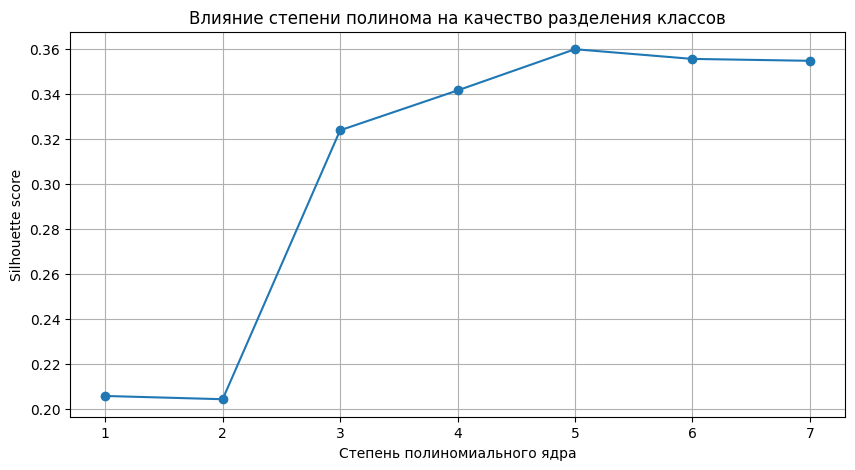

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, silhouettes, 'o-')
plt.title('Влияние степени полинома на качество разделения классов')
plt.xlabel('Степень полиномиального ядра')
plt.ylabel('Silhouette score')
plt.xticks(degrees)
plt.grid(True)
plt.show()

## 7. Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.

In [31]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

LDA

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

KernelPCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=3, gamma=1)
X_kpca = kpca.fit_transform(X_scaled)

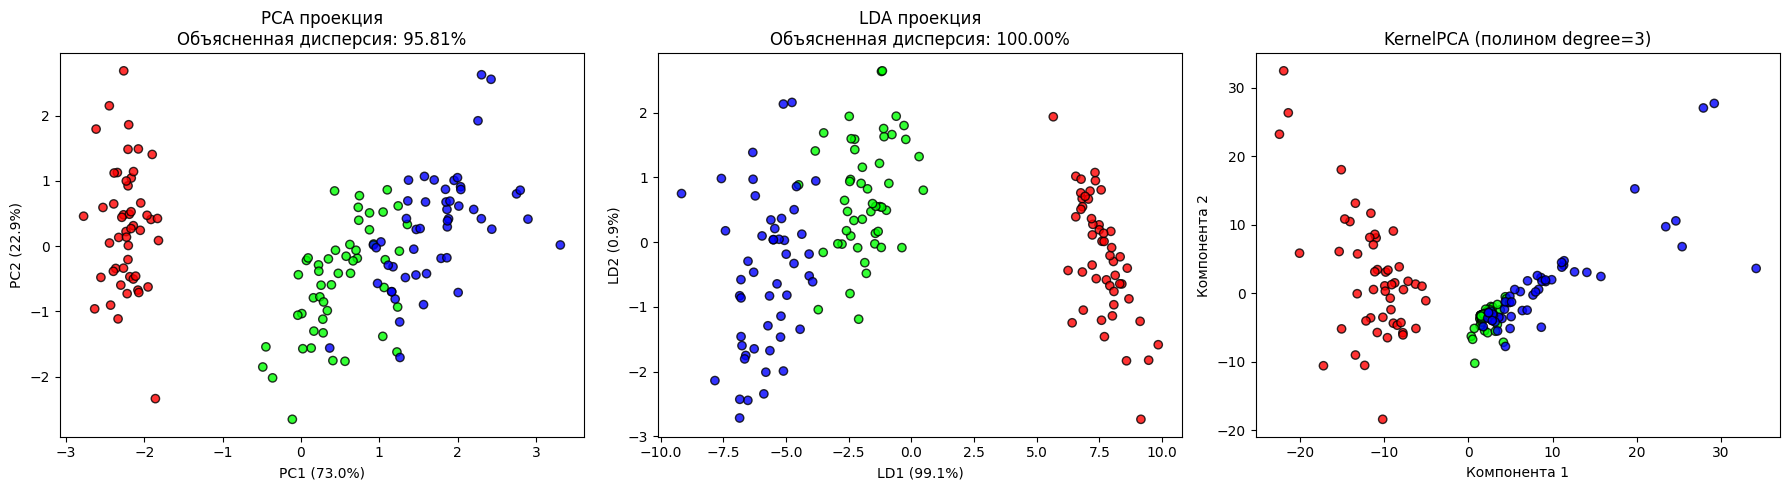

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=0.8, edgecolor='k')
plt.title('PCA проекция\nОбъясненная дисперсия: {:.2f}%'.format(sum(pca.explained_variance_ratio_)*100))
plt.xlabel('PC1 ({:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))

plt.subplot(1, 3, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap, alpha=0.8, edgecolor='k')
plt.title('LDA проекция\nОбъясненная дисперсия: {:.2f}%'.format(sum(lda.explained_variance_ratio_)*100))
plt.xlabel('LD1 ({:.1f}%)'.format(lda.explained_variance_ratio_[0]*100))
plt.ylabel('LD2 ({:.1f}%)'.format(lda.explained_variance_ratio_[1]*100))

plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap=cmap, alpha=0.8, edgecolor='k')
plt.title('KernelPCA (полином degree=3)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')

plt.tight_layout()
plt.show()

## 8. Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.

In [32]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
perplexities = [5, 30, 50, 100, 200]

In [ ]:
plt.figure(figsize=(20, 12))
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF',
                      '#00FFFF', '#FFA500', '#800080', '#A52A2A', '#008000'])

<Figure size 2000x1200 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-52-fa5d6339bce5>:16: UserWarning: *c* argument looks like a single num

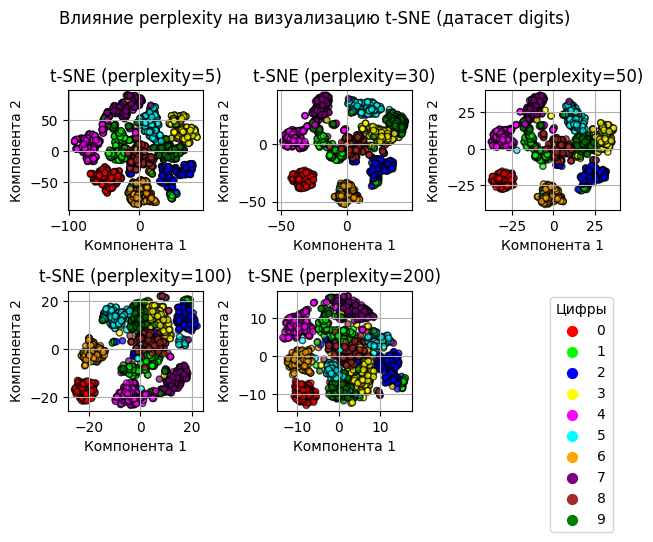

In [ ]:
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(2, 3, i+1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap, alpha=0.7,
                        edgecolor='k', s=20)
    plt.title(f't-SNE (perplexity={perplexity})')
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

plt.subplot(2, 3, 6)
plt.axis('off')
for i in range(10):
    plt.scatter([], [], c=cmap(i), label=str(i), s=50)
plt.legend(title='Цифры', bbox_to_anchor=(1, 1))
plt.suptitle('Влияние perplexity на визуализацию t-SNE (датасет digits)', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
perplexity_range = np.arange(5, 201, 10)
silhouettes = []

In [ ]:
for p in perplexity_range:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    silhouettes.append(silhouette_score(X_tsne, y))

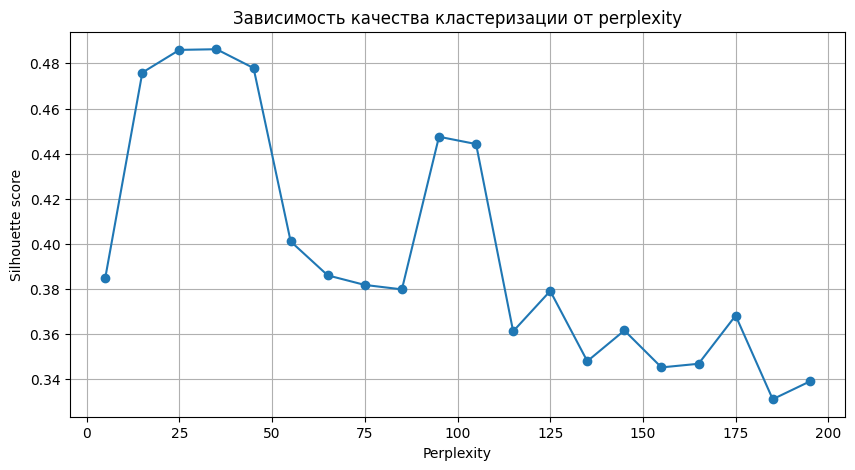

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(perplexity_range, silhouettes, 'o-')
plt.title('Зависимость качества кластеризации от perplexity')
plt.xlabel('Perplexity')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

## 9. Визуализируйте выбранный датасет при помощи разных методов понижения размерности.

In [33]:
from umap import UMAP

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
methods = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "t-SNE": TSNE(n_components=2, perplexity=30, random_state=42),
    "UMAP": UMAP(n_components=2, random_state=42),
    "KernelPCA (RBF)": KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-62-7f46c2efa52a>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=cmap(i), label=name, s=100)


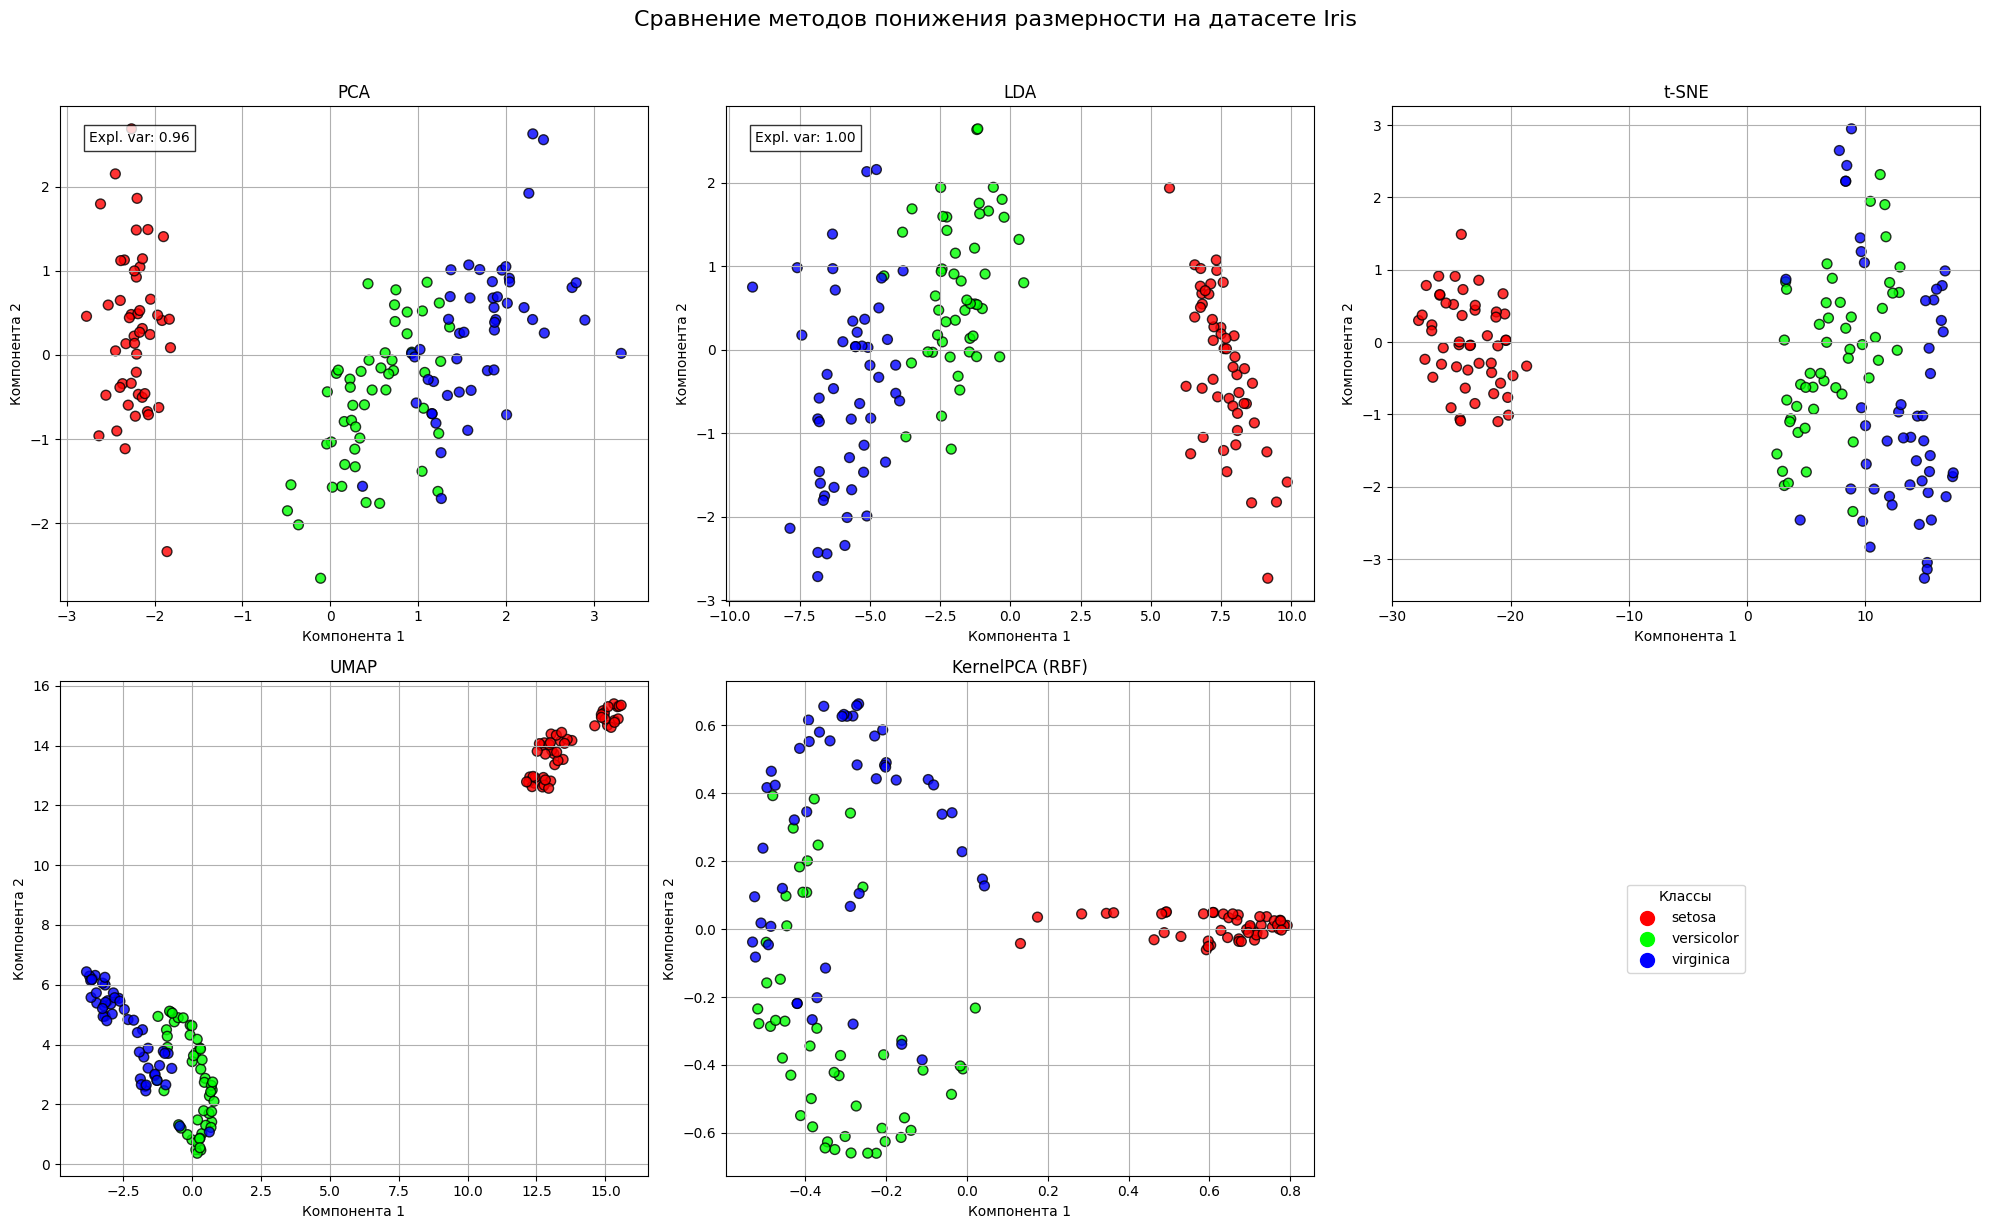

In [ ]:
plt.figure(figsize=(20, 12))

for i, (name, method) in enumerate(methods.items(), 1):
    if name == "LDA":
        X_reduced = method.fit_transform(X_scaled, y)
    else:
        X_reduced = method.fit_transform(X_scaled)

    plt.subplot(2, 3, i)
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap,
                        alpha=0.8, edgecolor='k', s=50)
    plt.title(name)
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.grid(True)

    if hasattr(method, 'explained_variance_ratio_'):
        plt.text(0.05, 0.95, f"Expl. var: {sum(method.explained_variance_ratio_):.2f}",
                transform=plt.gca().transAxes, ha='left', va='top',
                bbox=dict(facecolor='white', alpha=0.8))

plt.subplot(2, 3, 6)
plt.axis('off')
for i, name in enumerate(target_names):
    plt.scatter([], [], c=cmap(i), label=name, s=100)
plt.legend(title='Классы', loc='center')
plt.suptitle('Сравнение методов понижения размерности на датасете Iris', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## 10. Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.

In [34]:
from sklearn.metrics import mean_squared_error

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
max_components = 4
n_components = range(1, max_components+1)
n_classes = len(np.unique(y))

PCA

In [ ]:
pca = PCA(n_components=max_components)
pca.fit(X_scaled)
pca_var = np.cumsum(pca.explained_variance_ratio_)

LDA

In [ ]:
lda = LDA(n_components=n_classes-1)
lda.fit(X_scaled, y)
lda_var = np.cumsum(lda.explained_variance_ratio_)

KernelPCA

In [ ]:
kpca_var = []
for n in n_components:
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.5, fit_inverse_transform=True, random_state=42)
    X_transformed = kpca.fit_transform(X_scaled)
    X_reconstructed = kpca.inverse_transform(X_transformed)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    var_ratio = 1 - mse/np.var(X_scaled).sum()
    kpca_var.append(var_ratio)
kpca_var = np.array(kpca_var)

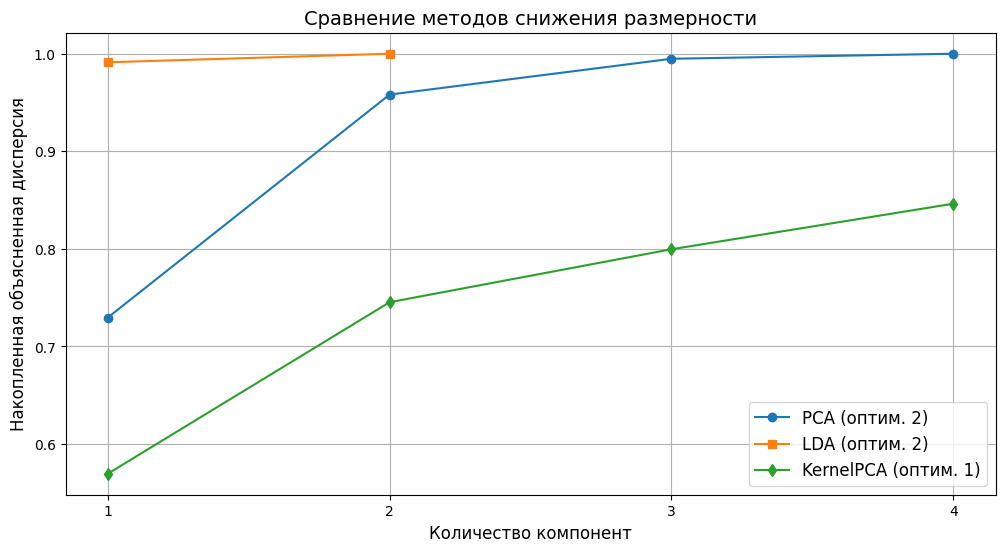

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(n_components, pca_var, 'o-', label=f'PCA (оптим. {np.argmax(pca_var>=0.95)+1})')
lda_x = range(1, n_classes)
plt.plot(lda_x, lda_var, 's-', label=f'LDA (оптим. {len(lda_var)})')
plt.plot(n_components, kpca_var, 'd-', label=f'KernelPCA (оптим. {np.argmax(kpca_var>=0.90)+1})')

plt.title('Сравнение методов снижения размерности', fontsize=14)
plt.xlabel('Количество компонент', fontsize=12)
plt.ylabel('Накопленная объясненная дисперсия', fontsize=12)
plt.xticks(n_components)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [ ]:
print(f"PCA: оптимально {np.argmax(pca_var>=0.95)+1} компоненты (объясняет {pca_var[np.argmax(pca_var>=0.95)]:.1%})")
print(f"LDA: оптимально {len(lda_var)} компоненты (объясняет {lda_var[-1]:.1%})")
print(f"KernelPCA: оптимально {np.argmax(kpca_var>=0.90)+1} компоненты (объясняет {kpca_var[np.argmax(kpca_var>=0.90)]:.1%})")

PCA: оптимально 2 компоненты (объясняет 95.8%)
LDA: оптимально 2 компоненты (объясняет 100.0%)
KernelPCA: оптимально 1 компоненты (объясняет 57.0%)


## 11. Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

In [54]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [35]:
iris = load_iris()
X = iris.data
y = iris.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
max_components = 4
n_components = range(1, max_components+1)
n_classes = len(np.unique(y))

In [41]:
metrics = {
    'PCA': {'train': [], 'test': []},
    'LDA': {'train': [], 'test': []},
    'KernelPCA': {'train': [], 'test': []}
}

PCA

In [42]:
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)

    metrics['PCA']['train'].append(sum(pca.explained_variance_ratio_))

    test_var = np.sum(pca.explained_variance_ratio_)
    metrics['PCA']['test'].append(test_var)

LDA

In [43]:
for n in range(1, n_classes):
    lda = LDA(n_components=n)
    lda.fit(X_train_scaled, y_train)

    metrics['LDA']['train'].append(sum(lda.explained_variance_ratio_))

    X_test_lda = lda.transform(X_test_scaled)
    between_class = np.cov(lda.scalings_.T @ X_test_scaled.T)
    total = np.cov(X_test_scaled.T)
    test_var = np.trace(between_class) / np.trace(total)
    metrics['LDA']['test'].append(test_var)

KernelPCA

In [44]:
for n in n_components:
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.5,
                    fit_inverse_transform=True, random_state=42)
    kpca.fit(X_train_scaled)

    X_train_kpca = kpca.transform(X_train_scaled)
    X_train_recon = kpca.inverse_transform(X_train_kpca)
    train_mse = mean_squared_error(X_train_scaled, X_train_recon)
    metrics['KernelPCA']['train'].append(1 - train_mse/np.var(X_train_scaled).sum())

    X_test_kpca = kpca.transform(X_test_scaled)
    X_test_recon = kpca.inverse_transform(X_test_kpca)
    test_mse = mean_squared_error(X_test_scaled, X_test_recon)
    metrics['KernelPCA']['test'].append(1 - test_mse/np.var(X_test_scaled).sum())

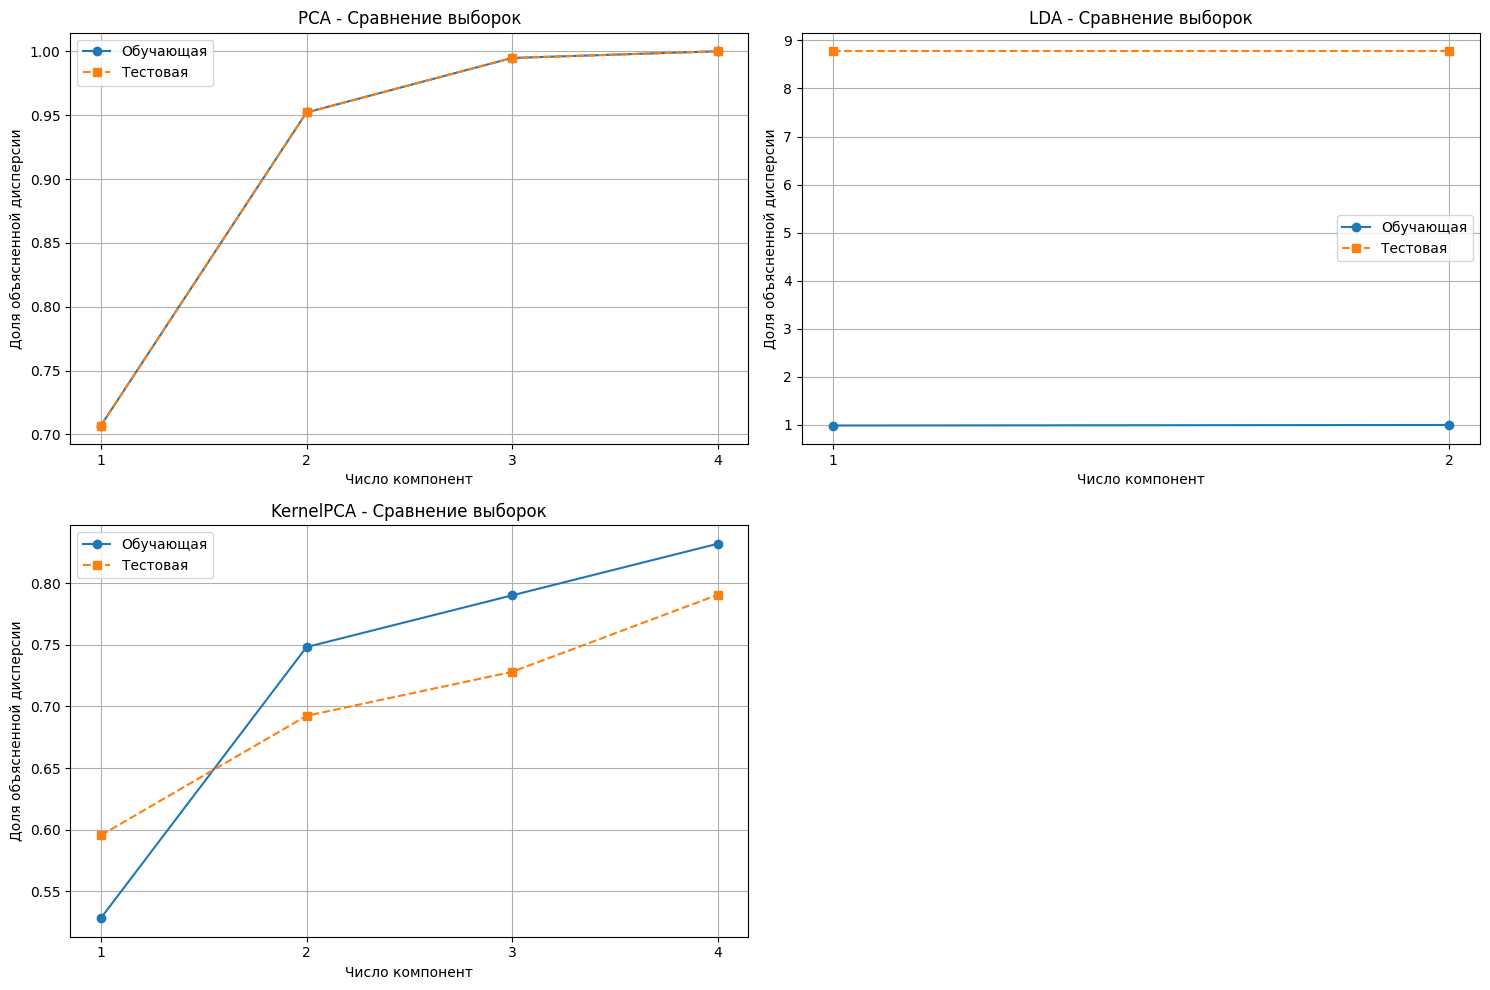

In [45]:
plt.figure(figsize=(15, 10))

for i, method in enumerate(metrics.keys(), 1):
    plt.subplot(2, 2, i)

    if method == 'LDA':
        x_vals = range(1, n_classes)
    else:
        x_vals = n_components

    plt.plot(x_vals, metrics[method]['train'], 'o-', label='Обучающая')
    plt.plot(x_vals, metrics[method]['test'], 's--', label='Тестовая')

    plt.title(f'{method} - Сравнение выборок')
    plt.xlabel('Число компонент')
    plt.ylabel('Доля объясненной дисперсии')
    plt.xticks(x_vals)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
table = []
headers = ['Метод', 'Компоненты', 'Обучающая', 'Тестовая', 'Разница']

In [50]:
metrics['PCA']['train']

[np.float64(0.7070102010784378),
 np.float64(0.9520870679186885),
 np.float64(0.9947545416317595),
 np.float64(1.0)]

In [52]:
for method in metrics:
    best_n = {
        'PCA': np.argmax(metrics[method]['train'][0] >= 0.95) + 1,
        'LDA': n_classes - 1,
        'KernelPCA': np.argmax(metrics[method]['train'][0] >= 0.90) + 1
    }[method]

    idx = best_n - 1 if method != 'LDA' else best_n - 1
    train_score = metrics[method]['train'][idx]
    test_score = metrics[method]['test'][idx]

    table.append([
        method,
        best_n,
        f"{train_score:.1%}",
        f"{test_score:.1%}",
        f"{abs(train_score-test_score):.1%}"
    ])

In [55]:
print(tabulate(table, headers=headers, tablefmt="grid"))

+-----------+--------------+-------------+------------+-----------+
| Метод     |   Компоненты | Обучающая   | Тестовая   | Разница   |
+===========+==============+=============+============+===========+
| PCA       |            1 | 70.7%       | 70.7%      | 0.0%      |
+-----------+--------------+-------------+------------+-----------+
| LDA       |            2 | 100.0%      | 877.3%     | 777.3%    |
+-----------+--------------+-------------+------------+-----------+
| KernelPCA |            1 | 52.8%       | 59.6%      | 6.7%      |
+-----------+--------------+-------------+------------+-----------+
